In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
from matplotlib import style
import statsmodels.formula.api as st

In [123]:
insurance = pd.read_csv("Desktop/Insurance.csv")

In [124]:
print(insurance.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [125]:
gender=pd.get_dummies(insurance['sex'],drop_first = True)
print(gender.head(5))

   male
0     0
1     1
2     1
3     1
4     1


In [126]:
smoke=pd.get_dummies(insurance['smoker'], drop_first = True)
print(smoke.head(5))

   yes
0    1
1    0
2    0
3    0
4    0


In [127]:
insurance = pd.concat([insurance,gender,smoke],axis=1)
print(insurance.head(5))

   age     sex     bmi  children smoker     region      charges  male  yes
0   19  female  27.900         0    yes  southwest  16884.92400     0    1
1   18    male  33.770         1     no  southeast   1725.55230     1    0
2   28    male  33.000         3     no  southeast   4449.46200     1    0
3   33    male  22.705         0     no  northwest  21984.47061     1    0
4   32    male  28.880         0     no  northwest   3866.85520     1    0


In [128]:
insurance.drop(['sex','smoker','region'],axis=1,inplace=True)
print(insurance.head(5))

   age     bmi  children      charges  male  yes
0   19  27.900         0  16884.92400     0    1
1   18  33.770         1   1725.55230     1    0
2   28  33.000         3   4449.46200     1    0
3   33  22.705         0  21984.47061     1    0
4   32  28.880         0   3866.85520     1    0


In [129]:
print(insurance.tail(5))

      age    bmi  children     charges  male  yes
1333   50  30.97         3  10600.5483     1    0
1334   18  31.92         0   2205.9808     0    0
1335   18  36.85         0   1629.8335     0    0
1336   21  25.80         0   2007.9450     0    0
1337   61  29.07         0  29141.3603     0    1


In [130]:
X=(insurance.iloc[:,[0,1,2,4,5]].values)
Y=(insurance.iloc[:,[3]].values)

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [132]:
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [133]:
r2_score = reg.score(X_test,Y_test)
print(r2_score)

0.699572339532746


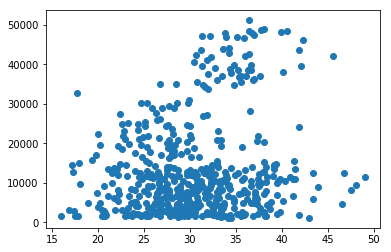

In [134]:
plt.scatter(insurance.bmi.head(500),insurance.charges.head(500))
plt.show()

In [135]:
print(reg.coef_)

[[  263.17564847   305.39865597   396.72909921  -349.77131205
  24531.93659984]]


In [136]:
print(reg.intercept_)

[-11546.45473893]


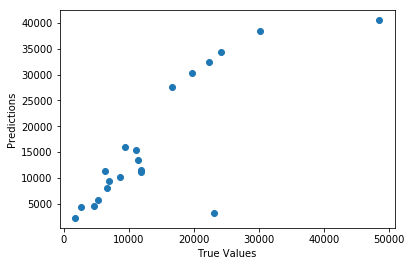

In [137]:
plt.scatter(Y_test[0:20], Y_pred[0:20])
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()